In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np

## Read Data

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
sentiment_counts = df.airline_sentiment.value_counts()
number_of_tweets = df.tweet_id.count()
print(sentiment_counts)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


In [4]:
dff = df.groupby(["airline", "airline_sentiment" ]).count()["name"]
dff['American']

airline_sentiment
negative    1960
neutral      463
positive     336
Name: name, dtype: int64

In [5]:
airlines=df.airline.unique()
positive_percentage = []
negative_percentage = []
neutral_percentage = []
for i in airlines:
    positive_percentage.append((dff[i].positive/dff[i].sum())*100)
    negative_percentage.append((dff[i].negative/dff[i].sum())*100)
    neutral_percentage.append((dff[i].neutral/dff[i].sum())*100)
percentage_data = [positive_percentage,negative_percentage,neutral_percentage]
percentage_data = np.array(percentage_data)
percentage_data=percentage_data.reshape(6,3)

In [6]:
my_series = pd.DataFrame(data=percentage_data, index =airlines)
my_series[0] = positive_percentage
my_series[1] = negative_percentage
my_series[2] = neutral_percentage
my_series

,0,1,2
Virgin America,30.158730,35.912698,33.928571
United,12.872841,68.890633,18.236525
Southwest,23.553719,49.008264,27.438017
Delta,24.482448,42.979298,32.538254
US Airways,9.234466,77.686234,13.079300
American,12.178325,71.040232,16.781443


## Data Preprocessing

As we are interested in only 2 columns for our purpose of classfication, we are taking subset of whole data frame

In [7]:
data = df[['text','airline_sentiment']]
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## Converting labels into integers 

neutral = 0
positive = 1
negative = 2

In [8]:
data.loc[:,('airline_sentiment')] = data.airline_sentiment.map({'neutral':0, 'positive':1,'negative':2})
data.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,2
4,@VirginAmerica and it's a really big bad thing...,2


## Seperating rows based on their labels

In [9]:
positive_sentiment_words = ''
negative_sentiment_words = ''
neutral_sentiment_words = ''
neutral = data[data.airline_sentiment == 0]
positive = data[data.airline_sentiment ==1]
negative = data[data.airline_sentiment ==2]

## Tokenizing, Lematizing and removing stop words from data

In [10]:
import nltk,re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
for val in neutral.text:
    text = val.lower()
    only_letters = re.sub("[^a-zA-Z]", " ",text) 
    tokens = nltk.word_tokenize(only_letters )[2:]
    for word in tokens:
        if word not in stop_words:
            word = wordnet_lemmatizer.lemmatize(word)
            neutral_sentiment_words =  neutral_sentiment_words + word + ' '
            
for val in positive.text:
    text = val.lower()
    only_letters = re.sub("[^a-zA-Z]", " ",text) 
    tokens = nltk.word_tokenize(only_letters )[2:]
    for word in tokens:
        if word not in stop_words:
            word = wordnet_lemmatizer.lemmatize(word)
            positive_sentiment_words =  positive_sentiment_words + word + ' '
            
for val in negative.text:
    text = val.lower()
    only_letters = re.sub("[^a-zA-Z]", " ",text) 
    tokens = nltk.word_tokenize(only_letters )[2:]
    for word in tokens:
        if word not in stop_words:
            word = wordnet_lemmatizer.lemmatize(word)
            negative_sentiment_words =  negative_sentiment_words + word + ' '

## Classification

Splitting data into training and test data ( test_size = 0.2 )

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["airline_sentiment"], test_size = 0.2, random_state = 10)
print("train tuples",X_train.shape)
print("test tuples",X_test.shape)
print("train labels",y_train.shape)
print("test labels",y_test.shape)
vect = CountVectorizer()
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


train tuples (11712,)
test tuples (2928,)
train labels (11712,)
test labels (2928,)


### Model  - LSTM

Long and short-term memory networks, often called LSTMs, are a special kind of RNN that can learn long-term dependencies. It was proposed by Hochreiter and Schmidhuber (1997), and was improved and popularized by many people in the following work. LSTM has performed very well on a variety of problems and is now widely used.

In [13]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
from keras.preprocessing.text import Tokenizer
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Y = pd.get_dummies(data['airline_sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 128)           256000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
batch_size = 256
history = model.fit(X_train, 
                    Y_train, 
                    epochs = 10, 
                    batch_size=batch_size, 
                    validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 11712 samples, validate on 2928 samples
Epoch 1/10
11712/11712 [==============================] - 24s 2ms/step - loss: 0.8427 - accuracy: 0.6457 - val_loss: 0.6857 - val_accuracy: 0.7117
Epoch 2/10
11712/11712 [==============================] - 23s 2ms/step - loss: 0.6326 - accuracy: 0.7391 - val_loss: 0.5483 - val_accuracy: 0.7896
Epoch 3/10
11712/11712 [==============================] - 24s 2ms/step - loss: 0.5089 - accuracy: 0.8003 - val_loss: 0.5080 - val_accuracy: 0.7951
Epoch 4/10
11712/11712 [==============================] - 24s 2ms/step - loss: 0.4455 - accuracy: 0.8250 - val_loss: 0.4978 - val_accuracy: 0.7999
Epoch 5/10
11712/11712 [==============================] - 23s 2ms/step - loss: 0.4128 - accuracy: 0.8414 - val_loss: 0.4835 - val_accuracy: 0.8125
Epoch 6/10
11712/11712 [==============================] - 23s 2ms/step - loss: 0.3899 - accuracy: 0.8490 - val_loss: 0.4916 - val_accuracy: 0.8149
Epoch 7/10
11712/1171

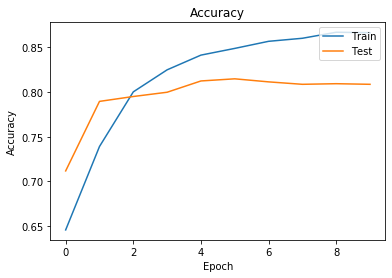

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Deep learning model (LSTM) outperforms other models in terms of accuracy. Its accuracy rate reached 81.49%.

## Save models

In [39]:
import pickle
# Save model
pickle.dump(history, open('LSTM_model.dat', 'wb'))